In [52]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.svm import SVC
from sklearn.svm import LinearSVR
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier


import os
import pandas as pd
import seaborn as sns

In [20]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    


def plot_predictions(clf, axes, n_samples=100):
    x0s = np.linspace(axes[0], axes[1], n_samples)
    x1s = np.linspace(axes[2], axes[3], n_samples)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [14]:
iris = datasets.load_iris()
X = iris["data"][:, (2,3)]
y = (iris["target"] == 2).astype(np.float64)

pd_X, pd_y= pd.DataFrame(X), pd.DataFrame(y)


In [18]:
#linear svc
svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("linear_svm", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svm',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [17]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [19]:
X, y = make_moons(n_samples=200, noise=0.15)
poly_svm_clf = Pipeline([
 ("poly_features", PolynomialFeatures(degree=3)),
 ("scaler", StandardScaler()),
 ("svm_clf", LinearSVC(C=1, loss="hinge"))
])
poly_svm_clf.fit(X, y)



Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

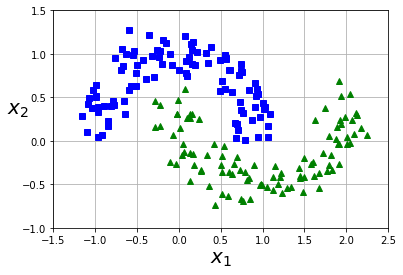

In [22]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

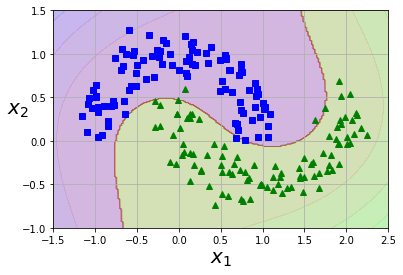

In [24]:
plot_predictions(poly_svm_clf, [-1.5, 2.5, -1, 1.5], n_samples=200)
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [28]:
poly_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [29]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

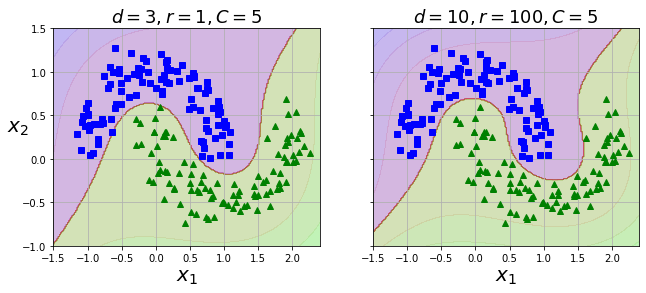

In [30]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5], n_samples=200)
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5],n_samples=200)
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

#save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

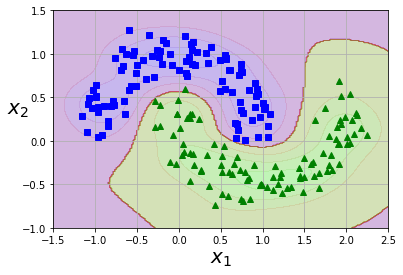

In [37]:
# Gaussian rbf
# hyperparameters:
# gamma -> increasing gamma maks bell shape narrower; Each instance range of influence is smaller
# small gamma makes bell curve wider, bells curve for features overlap more
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.01))
    ])
rbf_kernel_svm_clf.fit(X, y)

plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5], n_samples=200)
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [38]:
# Regression

np.random.seed(42)
m = 50
X_r = 2 * np.random.rand(m, 1)
y_r = (4 + 3 * X_r + np.random.randn(m, 1)).ravel()


In [39]:
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_r, y_r)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [40]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X_r, y_r)
svm_reg2.fit(X_r, y_r)

def find_support_vectors(svm_reg, X_r, y_r):
    y_pred = svm_reg.predict(X_r)
    off_margin = (np.abs(y_r - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X_r, y_r)
svm_reg2.support_ = find_support_vectors(svm_reg2, X_r, y_r)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])



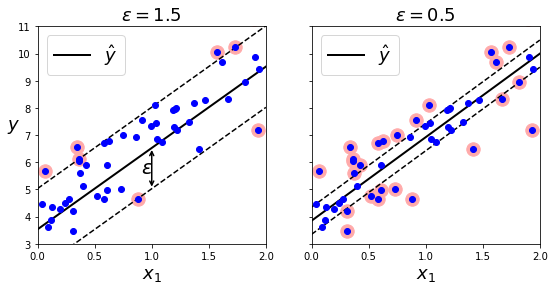

In [41]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X_r, y_r, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X_r, y_r, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
#save_fig("svm_regression_plot")
plt.show()



In [56]:
# ("poly_features", PolynomialFeatures(degree=3)),
X = iris["data"][:, (2,3)]
y = (iris["target"] == 2).astype(np.float64) 

C = 5
alpha = 1 / (C * len(X))
lin_svm_clf = LinearSVC(C=C, loss="hinge")
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)

scaler = StandardScaler()

linear_svm_clf_pip = Pipeline([
 ("scaler", scaler),
 ("lin_svm_clf", lin_svm_clf)
])
svm_clf_pip = Pipeline([
 ("scaler", scaler),
 ("svm_clf", svm_clf)
])
sgd_svm_clf_pip = Pipeline([
 ("scaler", scaler),
 ("sgd_clf", sgd_clf)
])

linear_svm_clf_pip.fit(X, y)
svm_clf_pip.fit(X, y)
sgd_svm_clf_pip.fit(X, y)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgd_clf',
                 SGDClassifier(alpha=0.0013333333333333333, average=False,
                               class_weight=None, early_stopping=False,
                               epsilon=0.1, eta0=0.001, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='constant',
                               loss='hinge', max_iter=1000, n_iter_no_change=5,
                               n_jobs=None, penalty='l2', power_t=0.5,
                               random_state=42, shuffle=True, tol=0.001,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False))],
         verbose=False)

In [54]:
print("LinearSVC:                   ", lin_svm_clf.intercept_, lin_svm_clf.coef_)
print("SVC:                   ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier:                   ", sgd_clf.intercept_, sgd_clf.coef_)
#linear_svm_clf.

LinearSVC:                    [-3.18022719] [[2.19696472 3.16753148]]
SVC:                    [-3.71602789] [[2.84187135 3.29080461]]
SGDClassifier:                    [-1.394] [[0.97438163 1.33109798]]


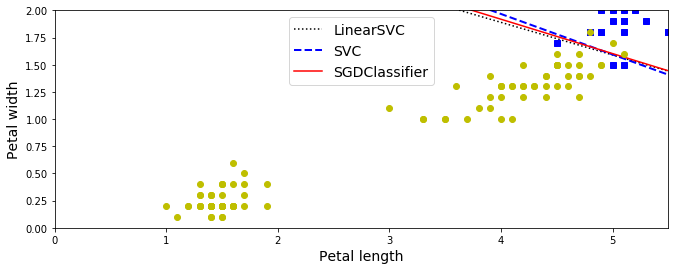

In [57]:
# Compute the slope and bias of each decision boundary
w1 = -lin_svm_clf.coef_[0, 0]/lin_svm_clf.coef_[0, 1]
b1 = -lin_svm_clf.intercept_[0]/lin_svm_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()